In [ ]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/grading.py -O ../grading.py
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week1_intro/submit.py

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Selecting previously unselected package xvfb.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.9_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.9) ...
Setting up xvfb (2:1.19.6-1ubuntu4.9) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


In [ ]:
import gym
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
env = gym.make("Taxi-v3")
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
n_states = env.observation_space.n
n_actions = env.action_space.n
n_states, n_actions

(500, 6)

In [ ]:
x = [[i for i in range(2)] for j in range(3)] #columns, rows
x = np.array(x)
x

array([[0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
policy = [[1/6 for j in range(n_actions)] for i in range(n_states)]
policy = np.array(policy)
policy.shape, policy

((500, 6), array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        ...,
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]]))

In [ ]:
def initialize_policy(n_states, n_actions):
  policy = [[1/6 for j in range(n_actions)] for i in range(n_states)]#second range is about rows, outer axis i.e states this time
  policy = np.array(policy)
  return policy
policy = initialize_policy(n_states, n_actions)
policy.shape

(500, 6)

In [ ]:
assert type(policy) in (np.ndarray, np.matrix)

In [ ]:
1./n_actions

0.16666666666666666

In [ ]:
np.allclose(policy, 1./n_actions)

True

In [ ]:
assert np.allclose(policy.sum(axis = 1), 1)

In [ ]:
env.reset()

404

In [ ]:
env.action_space.sample()

0

In [ ]:
#play the game
def generate_session(env, policy, t_max = 10**4):
  states, actions = [], []
  total_reward = 0.

  state = env.reset()

  for t in range(t_max):
    a = np.random.choice(6 , p = policy[state])
    new_state, r, is_done, _ = env.step(a)

    states.append(state)
    actions.append(a)
    total_reward += r

    state = new_state
    if is_done:
      break;
  return states, actions, total_reward

In [ ]:
policy = initialize_policy(n_states, n_actions)

In [ ]:
policy[env.reset()]

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
policy[0]

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
np.random.choice(6 , p = policy[200])

3

In [ ]:
policy[200]

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [ ]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
np.reshape(a, 6, 'C')

array([0, 1, 2, 3, 4, 5])

In [ ]:
s, a, r = generate_session(env, policy)

In [ ]:
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) in [float, np.float]

In [ ]:
generate_session(env, policy, 1000)[-1]

-365.0

In [ ]:
sample_rewards = [generate_session(env, policy, 1000)[-1] for _ in range(200)]

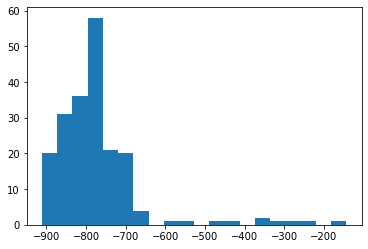

In [ ]:
plt.hist(sample_rewards, bins = 20)
plt.show()

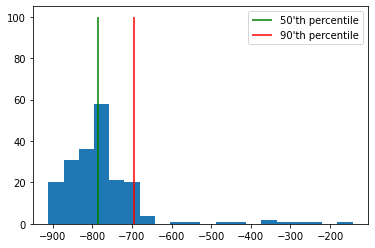

In [ ]:
plt.hist(sample_rewards, bins = 20)
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

In [ ]:
np.percentile(sample_rewards, 50)

-785.0

In [ ]:
#Cross entropy method steps
def select_elites(states_batch, actions_batch, rewards_batch, percentile):

    reward_threshold = np.percentile(rewards_batch, percentile)

    elite_indexes = rewards_batch >= reward_threshold
    
    # print(states_batch)
    # print(elite_ids)

    elite_states = []
    elite_actions = []

    for index, val in enumerate(elite_indexes):
        if val:
            elite_states.extend([s for s in states_batch[index]])
            elite_actions.extend([a for a in actions_batch[index]])

    print(elite_states)
    print(elite_actions)

    return elite_states, elite_actions

In [ ]:
len(rewards_batch)

200

In [ ]:
np.percentile([3,4,5], 0)


3.0

In [ ]:
for session in range(3):
  print(session)

0
1
2


In [ ]:
states_batch = [
    [1, 2, 3],     # game1
    [4, 2, 0, 2],  # game2
    [3, 1],        # game3
]

actions_batch = [
    [0, 2, 4],     # game1
    [3, 2, 0, 1],  # game2
    [3, 3],        # game3
]
rewards_batch = [
    3,  # game1
    4,  # game2
    5,  # game3
]

test_result_0 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=0)
test_result_30 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(
    states_batch, actions_batch, rewards_batch, percentile=100)

assert np.all(test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1])  \
    and np.all(test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]),\
    "For percentile 0 you should return all states and actions in chronological order"
assert np.all(test_result_30[0] == [4, 2, 0, 2, 3, 1]) and \
    np.all(test_result_30[1] == [3, 2, 0, 1, 3, 3]),\
    "For percentile 30 you should only select states/actions from two first"
assert np.all(test_result_90[0] == [3, 1]) and \
    np.all(test_result_90[1] == [3, 3]),\
    "For percentile 90 you should only select states/actions from one game"
assert np.all(test_result_100[0] == [3, 1]) and\
    np.all(test_result_100[1] == [3, 3]),\
    "Please make sure you use >=, not >. Also double-check how you compute percentile."
print("Ok!")


Ok!


In [ ]:
len(states_batch[2])

2

In [ ]:
test_result_0 = select_elites(states_batch, actions_batch, rewards_batch, percentile=0)
test_result_30 = select_elites(states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90 = select_elites(states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(states_batch, actions_batch, rewards_batch, percentile=100)

In [ ]:
len(test_result_30[1])

6

In [ ]:
type(np.array(test_result_30[1]))

numpy.ndarray

In [ ]:
states_batch, actions_batch, rewards_batch = [], [], []
for _ in range(200):#200 sessions
  s, a, r = generate_session(env, policy, 200)#1000 timestamps
  states_batch.append(s)
  actions_batch.append(a)
  rewards_batch.append(r)


In [ ]:
test_result_0 = select_elites(states_batch, actions_batch, rewards_batch, percentile=0)
test_result_30 = select_elites(states_batch, actions_batch, rewards_batch, percentile=30)
test_result_90 = select_elites(states_batch, actions_batch, rewards_batch, percentile=90)
test_result_100 = select_elites(states_batch, actions_batch, rewards_batch, percentile=100)

In [ ]:
len(test_result_30[1])

400

In [ ]:
elite_states = test_result_30[0]
elite_actions = test_result_30[1]

elite_states = np.array(elite_states)
elite_actions = np.array(elite_actions)
type(elite_states), type(elite_actions)

(numpy.ndarray, numpy.ndarray)

In [ ]:
def get_new_policy(elite_states, elite_actions):
  new_policy = np.zeros([n_states, n_actions])

  for s, a in zip(elite_states, elite_actions):
    new_policy[s][a] +=1
  
  sum_of_actions_per_state = new_policy.sum(axis = 1)

  for index, sum in enumerate(sum_of_actions_per_state):
    if sum==0:
      new_policy[index] = np.ones(n_actions)/n_actions
    else:
      new_policy[index] = new_policy[index]/sum

  return new_policy

In [ ]:
elite_states = [1, 2, 3, 4, 2, 0, 2, 3, 1]
elite_actions = [0, 2, 4, 3, 2, 0, 1, 3, 3]

new_policy = get_new_policy(elite_states, elite_actions)

assert np.isfinite(new_policy).all(
), "Your new policy contains NaNs or +-inf. Make sure you don't divide by zero."
assert np.all(
    new_policy >= 0), "Your new policy can't have negative action probabilities"
assert np.allclose(new_policy.sum(
    axis=-1), 1), "Your new policy should be a valid probability distribution over actions"
reference_answer = np.array([
    [1.,  0.,  0.,  0.,  0.],
    [0.5,  0.,  0.,  0.5,  0.],
    [0.,  0.33333333,  0.66666667,  0.,  0.],
    [0.,  0.,  0.,  0.5,  0.5]])
# print(new_policy[:4,:5])
assert np.allclose(new_policy[:4, :5], reference_answer)
print("Ok!")

Ok!


In [ ]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])
    
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()
    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.show()

In [ ]:
policy = initialize_policy(n_states, n_actions)

mean reward = -778.008, threshold=-785.000


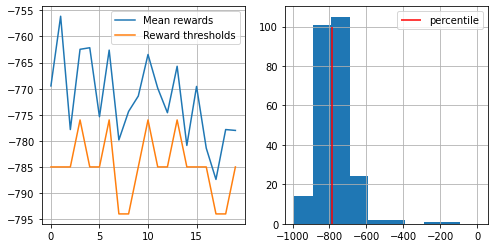

In [ ]:
n_sessions = 250  # sample this many sessions
percentile = 50  # take this percent of session with highest rewards
learning_rate = 0.5  # add this thing to all counts for stability

log = []

for i in range(20):

    # %time sessions = [ <YOUR CODE: generate a list of n_sessions new sessions> ]
    %time sessions = [generate_session(env, policy) for _ in range(n_sessions)]

    states_batch, actions_batch, rewards_batch = zip(*sessions)

    # elite_states, elite_actions = <YOUR CODE: select elite states/actions>
    elite_states, elite_actions = select_elites(states_batch,actions_batch,rewards_batch,percentile)

    # new_policy = <YOUR CODE: compute new policy>
    new_policy = get_new_policy(elite_states,elite_actions)
    
    policy = learning_rate*new_policy + (1-learning_rate)*policy

    # display results on chart
    show_progress(rewards_batch, log, percentile)